### Bias-variance trade-off

In [1]:
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.pipeline import make_pipeline

In [4]:
def PolynomialRegression(degree = 2, **kwargs):
    # combine a couple functions into a single function
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [5]:
import numpy as np

In [6]:
def make_data(N, err=1.0, rseed = 0):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 -1./ (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.rand(N)
    return X, y

In [28]:
X, y = make_data(40)

In [11]:
X

array([[3.01196262e-01],
       [5.11495830e-01],
       [3.63323688e-01],
       [2.96897683e-01],
       [1.79483389e-01],
       [4.17179205e-01],
       [1.91482567e-01],
       [7.95259085e-01],
       [9.28645916e-01],
       [1.47027398e-01],
       [6.26828536e-01],
       [2.79729836e-01],
       [3.22674623e-01],
       [8.56729137e-01],
       [5.04612156e-03],
       [7.59151487e-03],
       [4.08783595e-04],
       [6.93255807e-01],
       [6.05527929e-01],
       [7.56921138e-01],
       [9.57693860e-01],
       [6.38654411e-01],
       [2.12963202e-01],
       [6.09225795e-01],
       [1.39888398e-02],
       [4.09498914e-01],
       [2.05501650e-02],
       [8.92399363e-01],
       [2.72325671e-01],
       [1.71944524e-01],
       [6.99896719e-02],
       [5.99437806e-01],
       [2.08073126e-01],
       [3.23117154e-01],
       [3.53056600e-04],
       [3.81473607e-01],
       [3.74661174e-01],
       [3.80607556e-01],
       [8.90660436e-01],
       [4.64878920e-01]])

In [12]:
y

array([7.86696225, 8.80169783, 8.53931288, 7.54068443, 7.08873654,
       8.73707212, 6.77964566, 9.01193121, 9.34327653, 6.31557681,
       9.19435646, 7.80515029, 8.62248778, 9.0568169 , 0.68924876,
       0.86689628, 0.69382026, 8.99266421, 9.04893244, 9.07745706,
       9.21351643, 8.75656207, 7.46106576, 8.72819475, 1.42379371,
       8.40601245, 2.52569144, 9.08944243, 8.15212419, 6.41887784,
       5.09374913, 9.03893152, 7.7307785 , 8.2414339 , 0.77444503,
       7.96223075, 8.17604101, 8.03949686, 9.28671258, 8.34843684])

In [13]:
%matplotlib inline

In [21]:
import matplotlib.pyplot as plt

In [15]:
import seaborn; seaborn.set();

In [16]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

In [17]:
X_test

array([[-1.00000000e-01],
       [-9.75951904e-02],
       [-9.51903808e-02],
       [-9.27855711e-02],
       [-9.03807615e-02],
       [-8.79759519e-02],
       [-8.55711423e-02],
       [-8.31663327e-02],
       [-8.07615230e-02],
       [-7.83567134e-02],
       [-7.59519038e-02],
       [-7.35470942e-02],
       [-7.11422846e-02],
       [-6.87374749e-02],
       [-6.63326653e-02],
       [-6.39278557e-02],
       [-6.15230461e-02],
       [-5.91182365e-02],
       [-5.67134269e-02],
       [-5.43086172e-02],
       [-5.19038076e-02],
       [-4.94989980e-02],
       [-4.70941884e-02],
       [-4.46893788e-02],
       [-4.22845691e-02],
       [-3.98797595e-02],
       [-3.74749499e-02],
       [-3.50701403e-02],
       [-3.26653307e-02],
       [-3.02605210e-02],
       [-2.78557114e-02],
       [-2.54509018e-02],
       [-2.30460922e-02],
       [-2.06412826e-02],
       [-1.82364729e-02],
       [-1.58316633e-02],
       [-1.34268537e-02],
       [-1.10220441e-02],
       [-8.6

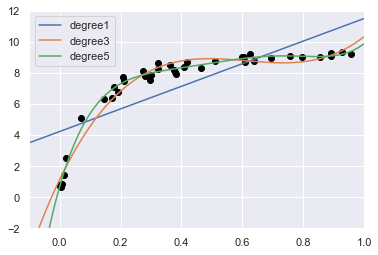

In [33]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree{0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

In [34]:
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import validation_curve

In [35]:
degree = np.arange(0, 21)

In [33]:
degree

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [36]:
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)

d:\andriy\university\ucu\master\python\python_for_ds\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0,0.5,'score')

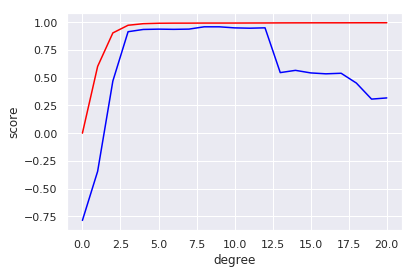

In [47]:
plt.plot(degree, np.median(train_score, 1), color='red', label='trainig_score')
plt.plot(degree, np.median(val_score, 1), color='blue', label='validation_score')
plt.xlabel('degree')
plt.ylabel('score')

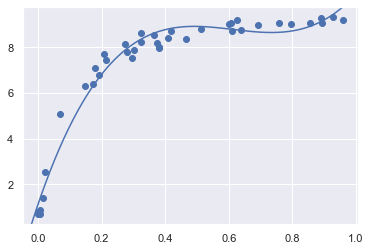

In [37]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);

### Validation curve

In [38]:
X2, y2 = make_data(200)

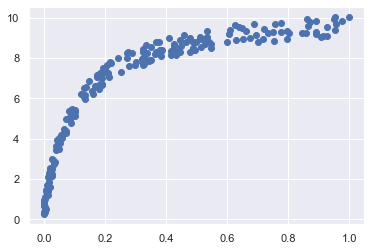

In [39]:
plt.scatter(X2.ravel(), y2)

In [40]:
train_score2,val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv=7)

d:\andriy\university\ucu\master\python\python_for_ds\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0, 0.5, 'score')

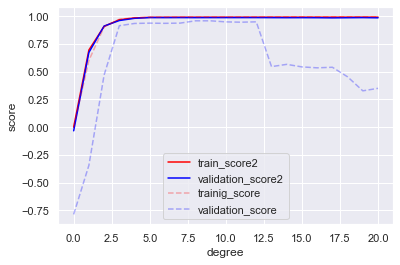

In [42]:
plt.plot(degree, np.median(train_score2, 1), color='red', label='train_score2')
plt.plot(degree, np.median(val_score2, 1), color='blue', label='validation_score2')
plt.plot(degree, np.median(train_score, 1), color='red', label='trainig_score', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='blue', label='validation_score', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.xlabel('degree')
plt.ylabel('score')

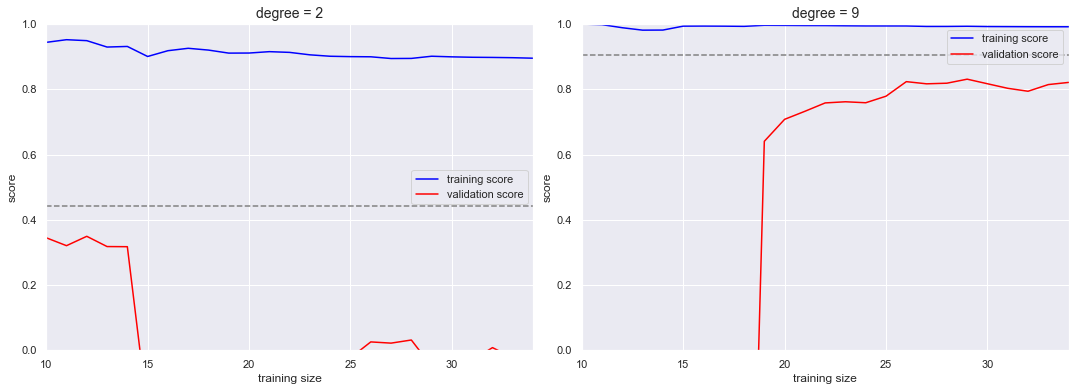

In [43]:
# from sklearn.learning_curve import learning_curve
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2,9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [44]:
learning_curve?

### Grid search

In [45]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid={'polynomialfeatures__degree': np.arange(5),
          'linearregression__fit_intercept': [True, False],
          'linearregression__normalize': [True, False]}

In [54]:
param_grid

{'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 'linearregression__fit_intercept': [True, False],
 'linearregression__normalize': [True, False]}

In [64]:
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [65]:
grid

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([0, 1, 2, 3, 4])})

In [66]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([0, 1, 2, 3, 4])})

In [67]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [68]:
model = grid.best_estimator_

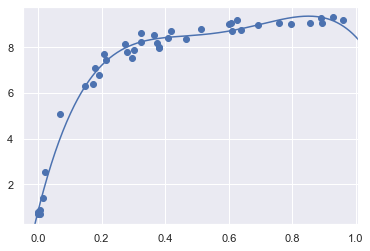

In [76]:
plt.scatter(X.ravel(), y)
lim=plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);

## Feature engineering
### Categorical features

In [7]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Downtown'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Lychakiv'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Stryiskyi Park'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Sykhiv'}
]

In [8]:
from sklearn.feature_extraction import DictVectorizer

In [9]:
vec = DictVectorizer(sparse=False, dtype=int)

In [10]:
vec.fit_transform(data)

array([[     1,      0,      0,      0, 850000,      4],
       [     0,      1,      0,      0, 700000,      3],
       [     0,      0,      1,      0, 650000,      3],
       [     0,      0,      0,      1, 600000,      2]])

In [11]:
vec.get_feature_names()

['neighborhood=Downtown',
 'neighborhood=Lychakiv',
 'neighborhood=Stryiskyi Park',
 'neighborhood=Sykhiv',
 'price',
 'rooms']

### Text features

In [12]:
sample=['problem of gambit',
       'Queen''s gambit',
       'another problem']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vec = CountVectorizer()

In [15]:
X = vec.fit_transform(sample)

In [16]:
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [17]:
import pandas as pd

In [18]:
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,another,gambit,of,problem,queens
0,0,1,1,1,0
1,0,1,0,0,1
2,1,0,0,1,0


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
vec = TfidfVectorizer()


In [111]:
X = vec.fit_transform(sample)

In [112]:
X

<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [113]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,another,gambit,of,problem,queens
0,0.000000,0.517856,0.680919,0.517856,0.000000
1,0.000000,0.605349,0.000000,0.000000,0.795961
2,0.795961,0.000000,0.000000,0.605349,0.000000


### Derived features

In [19]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

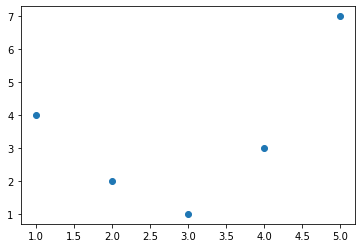

In [22]:
plt.scatter(x, y)

In [24]:
X = x[:, np.newaxis]

In [26]:
model = LinearRegression().fit(X, y)

In [27]:
yfit = model.predict(X)

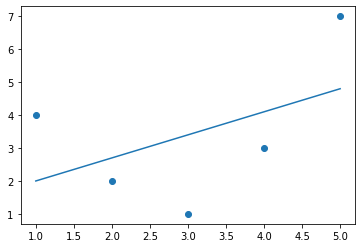

In [28]:
plt.scatter(x, y)
plt.plot(x, yfit)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [31]:
X2 = poly.fit_transform(X)

In [32]:
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [33]:
model = LinearRegression().fit(X2, y)

In [147]:
from sklearn.cluster import KMeans

In [34]:
yfit = model.predict(X2)

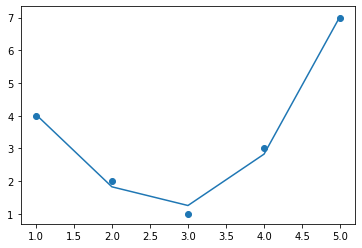

In [35]:
plt.scatter(x, y)
plt.plot(x, yfit)

In [37]:
from numpy import nan

In [38]:
X = np.array([[nan, 0, 3],
             [3, 7, 9],
             [3, 5, 2],
             [4, nan, 6],
             [8, 8, 1]])

In [39]:
y = np.array([14, 16, -1, 8, -5])

### Data cleaning and pipelines

In [137]:
# deprecated import
# from sklearn.preprocessing import Imputer

In [40]:
from sklearn.impute import SimpleImputer

In [41]:
imp = SimpleImputer(strategy='mean')

In [42]:
X2 = imp.fit_transform(X)

In [43]:
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [44]:
X3 = imp.fit(X)

In [45]:
X3.transform(X)

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [140]:
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [47]:
# build a pipeline that will perform as a model
# it is useful when you need you have some repeated operations then you can build a pipeline you can invoke any time
# basically it will execute each functiona inside the pipeline
model = make_pipeline(SimpleImputer(strategy='mean'),
                     PolynomialFeatures(degree=2),
                     LinearRegression())

In [49]:
model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [50]:
model.predict(X)

array([14., 16., -1.,  8., -5.])